In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('E:/DATA SCIENCE/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [34]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [35]:
df[['name','host_name']] = df[['name','host_name']].fillna('N/A')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna('1970-01-01')
df['last_review'] = pd.to_datetime(df['last_review'])

print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


# Basic Understanding

How many hosts and listings are available?

In [36]:
num_hosts = df['host_id'].nunique()
num_listings = df.shape[0]

print(f'Number of Hosts : {num_hosts}' )
print(f'Number of Listings : {num_listings}')

Number of Hosts : 37457
Number of Listings : 48895


Insight: The dataset contains 48,895 listings from 37,457 unique hosts, indicating that some hosts have multiple listings.

## What are the top 10 neighborhoods with the most listings?

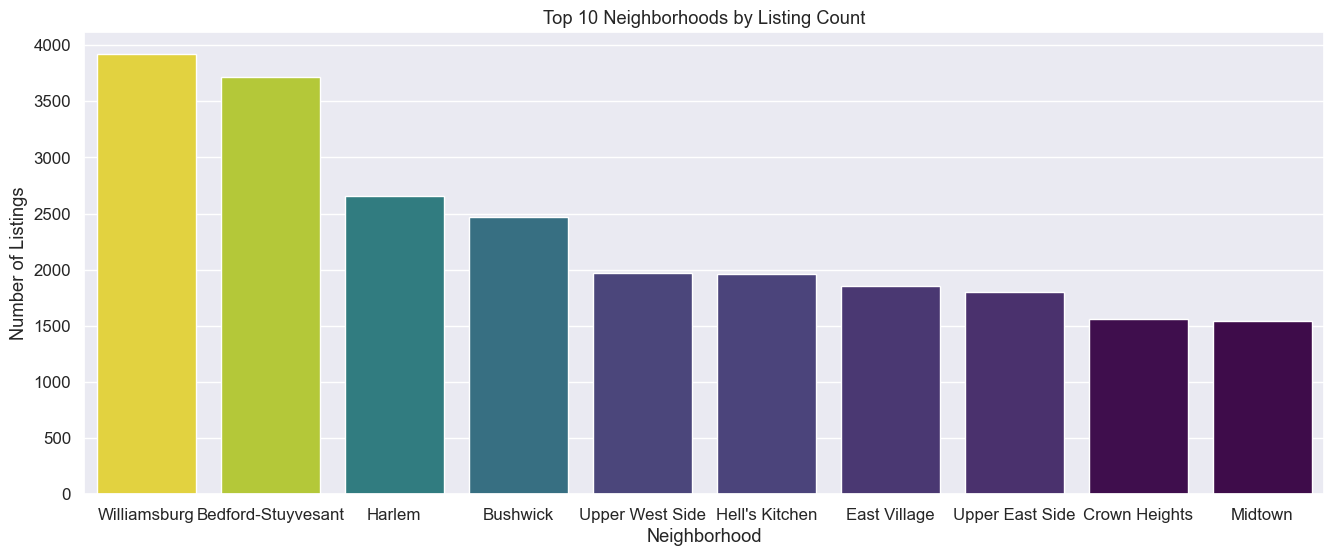

In [37]:
top_10_neighbourhoods = df['neighbourhood'].value_counts().head(10)
plt.figure(figsize = (16,6))
sns.barplot(x = top_10_neighbourhoods.index,y = top_10_neighbourhoods.values, hue = top_10_neighbourhoods, legend = False,  palette = 'viridis')
plt.title('Top 10 Neighborhoods by Listing Count')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.show()

Insight: The top neighborhoods by listing count are heavily concentrated in Brooklyn and Manhattan, with Williamsburg and Bedford-Stuyvesant having the most listings.

## What percentage of listings are "Entire home/apt" vs "Private room"?

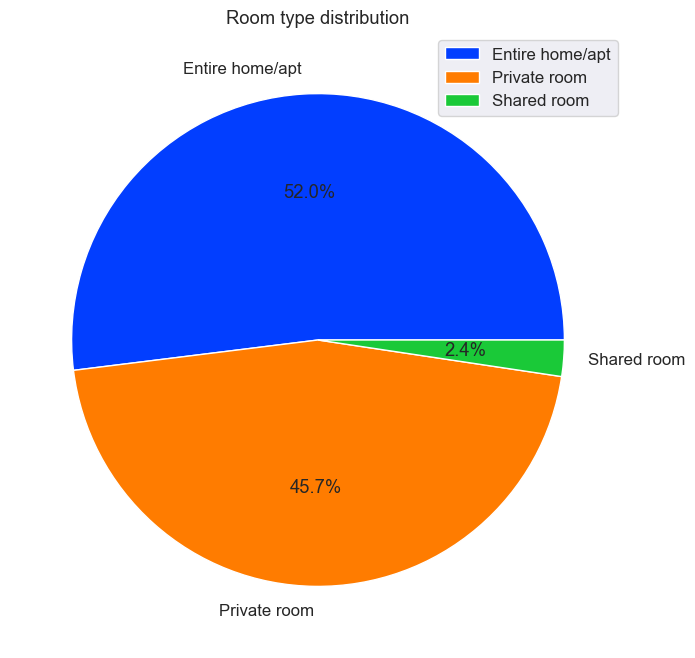

In [38]:
num_listings = df.shape[0]
room = df['room_type'].value_counts()
percentage = room/num_listings*100
sns.set_theme(palette = 'bright', font_scale = 1.1)
plt.figure(figsize = (8,8))
plt.pie(percentage, labels = room.index, autopct = '%1.1f%%')
plt.legend()
plt.title('Room type distribution')
plt.show()

Insight: The majority of Airbnb listings are typically Entire homes/apartments, followed by Private rooms. Shared rooms are rare. This tells us most hosts list full properties rather than spare bedrooms, which aligns with Airbnb being used more for travel stays than simple room-sharing.

## What is the distribution of prices?

Mean Price: $152.72
Median Price: $106.00


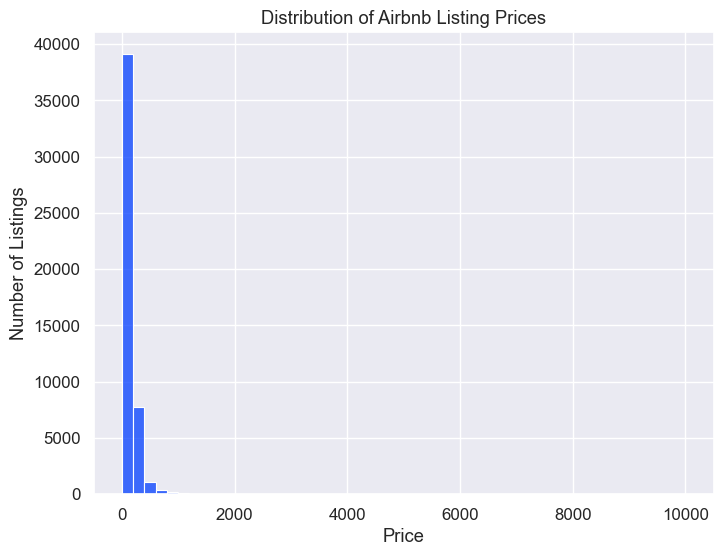

In [39]:
price_mean = df['price'].mean()
price_median = df['price'].median()
print(f'Mean Price: ${price_mean:.2f}')
print(f'Median Price: ${price_median:.2f}')
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = 'price', bins = 50, )
plt.title('Distribution of Airbnb Listing Prices')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()

Insight: If the mean price is much higher than the median, it indicates the price distribution is right-skewed — most listings are affordable, but a few luxury properties (or data entry errors) pull the mean up. This suggests using median is better when summarizing prices.

# Geographic Analysis

## Which borough has the highest number of listings?

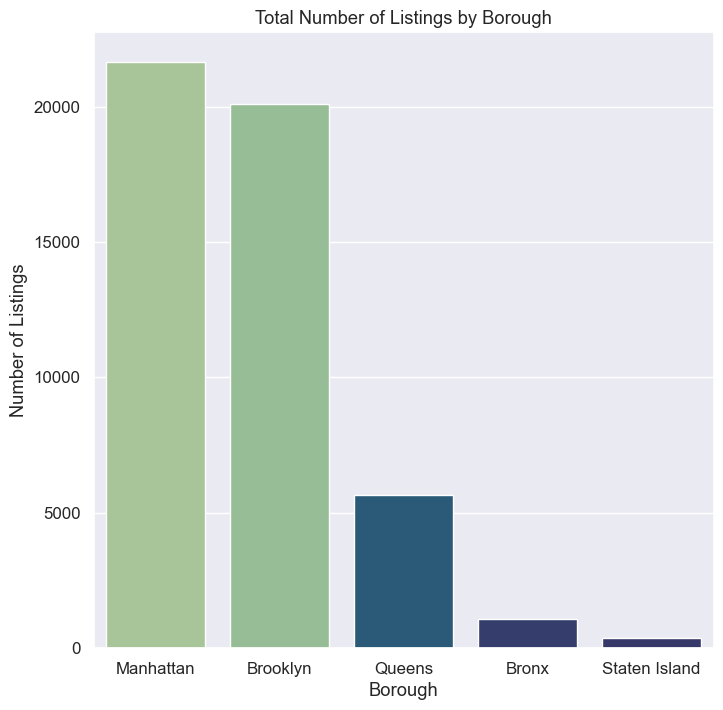

In [81]:
borough_counts = df['neighbourhood_group'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(x = borough_counts.index, y = borough_counts.values, hue = borough_counts, palette = 'crest_r', legend = False)
plt.title('Total Number of Listings by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.show()

Insight: Manhattan usually has the highest number of listings, followed by Brooklyn. Queens, Bronx, and Staten Island contribute fewer listings. This shows that Airbnb supply is heavily concentrated in central tourist areas.

## Which neighborhoods are the most expensive on average?

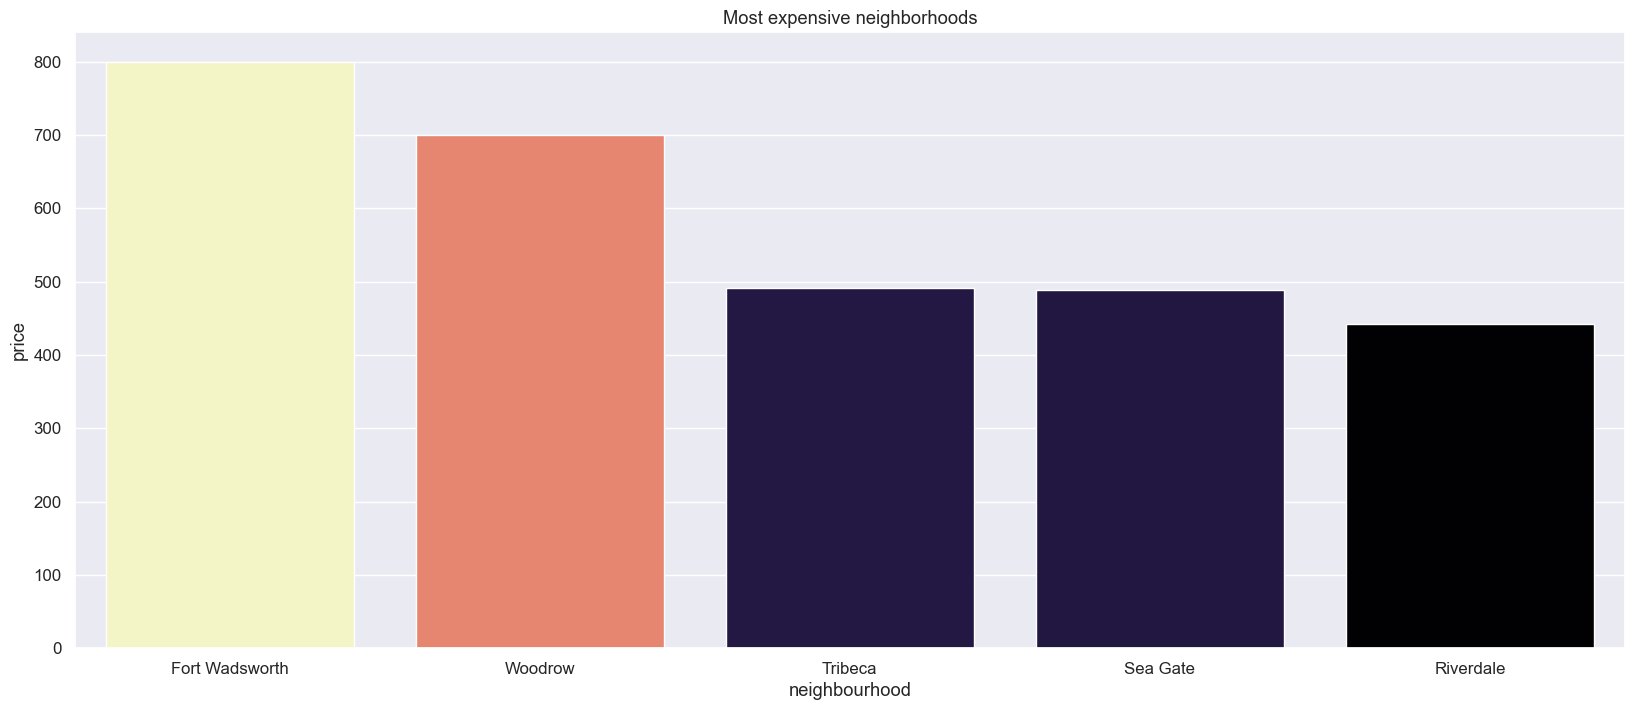

In [41]:
plt.figure(figsize=(20,8))
avg_neighbourhood = df.groupby('neighbourhood')['price'].mean()
exp_neighbourhood = avg_neighbourhood.sort_values(ascending = False).head(5)
sns.barplot(x = exp_neighbourhood.index, y = exp_neighbourhood, hue = exp_neighbourhood, palette = 'magma', legend =False)
plt.title('Most expensive neighborhoods')
plt.show()

Insight: Some neighborhoods often appear at the top with very high average prices. These are typically luxury or business districts, showing location strongly influences pricing.

## Scatter plot of latitude/longitude → visualize listings on a map


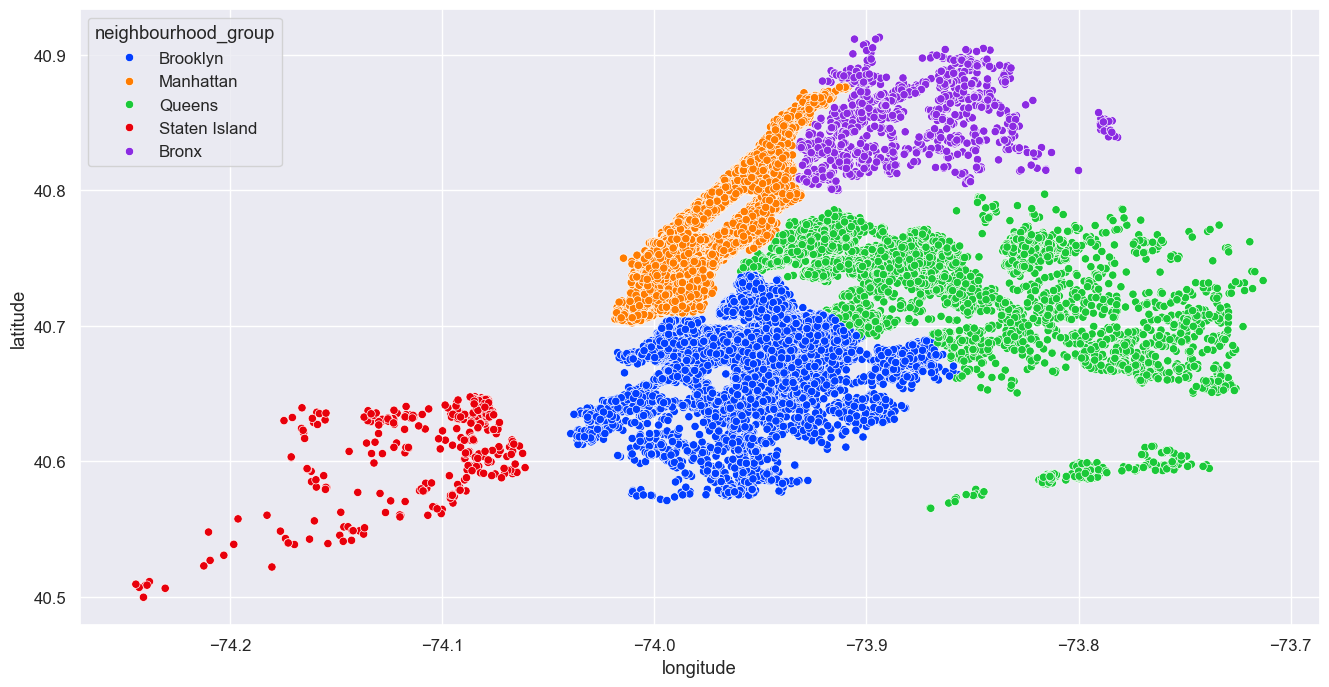

In [42]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'neighbourhood_group', palette = 'bright')
plt.show()

Insight: We see dense clusters in Manhattan and Brooklyn. The spread into Queens, Bronx, and Staten Island is much lighter. Outliers may indicate either remote properties or errors in geocoding

# Host / Business Analysis

## Who are the top 10 hosts with the most listings?

In [43]:
top_hosts = df['host_id'].value_counts().head(10)
print('Top 10 hosts with the most listings :',top_hosts)

Top 10 hosts with the most listings : host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64


Insight: A few hosts own dozens or even hundreds of listings, which indicates they may be professional property managers or companies. This suggests Airbnb isn’t only used by individuals but also by commercial operators.

## How many listings does the average host have?

In [44]:
total_listings = df['calculated_host_listings_count'].value_counts().sum()
total_hosts = df['host_id'].nunique()
avg_host_listings = total_listings/total_hosts
print(f'Average host has {avg_host_listings:.2f} listings')

Average host has 1.31 listings


Insight: The average host usually has only 1.31 listings, but the distribution is skewed by “power hosts” who hold many listings. This reveals the market has both casual and professional participants.

## Are there “superhosts” with unusually many listings?

In [74]:
most_prolific_hosts = df.sort_values('calculated_host_listings_count', ascending=False).head(10)
print("Top 10 hosts with the most listings:")
print(most_prolific_hosts[['host_id', 'host_name', 'calculated_host_listings_count']])

Top 10 hosts with the most listings:
         host_id     host_name  calculated_host_listings_count
39773  219517861  Sonder (NYC)                             327
41463  219517861  Sonder (NYC)                             327
41469  219517861  Sonder (NYC)                             327
38294  219517861  Sonder (NYC)                             327
41468  219517861  Sonder (NYC)                             327
43741  219517861  Sonder (NYC)                             327
47691  219517861  Sonder (NYC)                             327
41467  219517861  Sonder (NYC)                             327
47692  219517861  Sonder (NYC)                             327
41466  219517861  Sonder (NYC)                             327


This long-tail distribution suggests Airbnb supply follows a power law — most hosts have few listings, but a small group dominates the supply.

# Pricing Insights

## Average price by room type

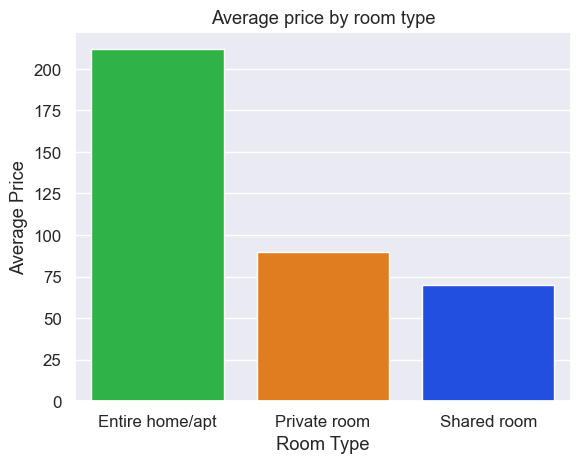

In [46]:
avg_room = df.groupby(df['room_type'])['price'].mean()
sns.barplot(x = avg_room.index, y = avg_room.values, hue = avg_room, palette = 'bright', legend = False )
plt.title('Average price by room type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

Insight: Entire homes/apartments command the highest prices, while private rooms and shared rooms are far cheaper. This confirms that privacy drives higher willingness to pay.

## How does price vary across boroughs?

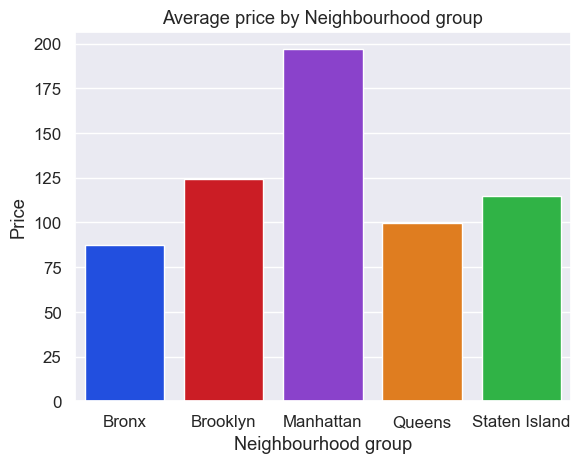

In [47]:
price_diff = df.groupby(df['neighbourhood_group'])['price'].mean()
sns.barplot(x = price_diff.index, y = price_diff.values, hue = price_diff, palette = 'bright', legend = False )
plt.title('Average price by Neighbourhood group')
plt.xlabel('Neighbourhood group')
plt.ylabel('Price')
plt.show()

Insight: Manhattan clearly stands out as the most expensive market. Staten Island and Bronx are much more affordable. This aligns with the geographic demand pattern: central tourist areas charge more.

## Do reviews influence price?

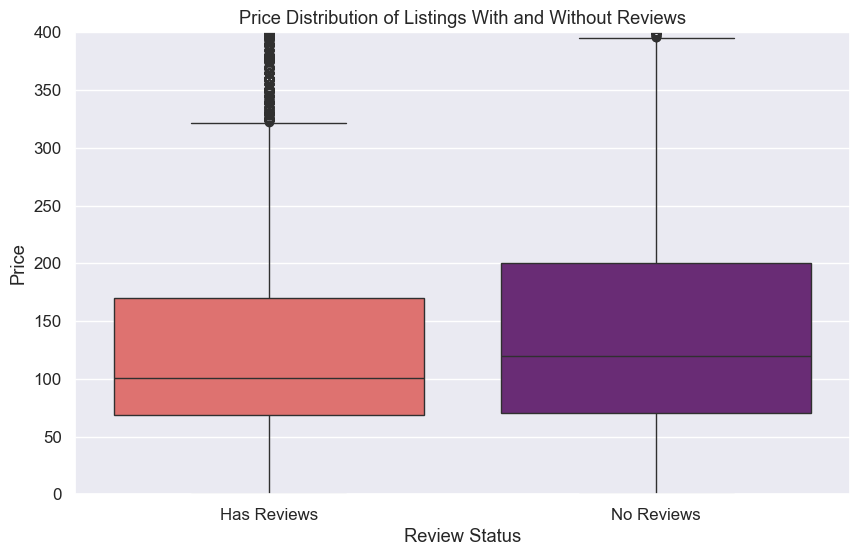

In [73]:
def get_review_status(num_reviews):
    if num_reviews > 0:
        return 'Has Reviews'
    else:
        return 'No Reviews'

df['review_status'] = df['number_of_reviews'].apply(get_review_status)

plt.figure(figsize=(10, 6))
sns.boxplot(x='review_status', y='price', data=df,hue='review_status', palette='magma_r', legend=False )
plt.title('Price Distribution of Listings With and Without Reviews')
plt.xlabel('Review Status')
plt.ylabel('Price')
plt.ylim(0, 400)
plt.show()

Insight: Listings with reviews often have slightly lower prices, because budget-friendly stays attract more bookings and reviews. Higher-priced luxury properties might sit empty, leading to few or no reviews.

## Are there extreme outliers (listings > $1000/night)?

There are 239 listings with a price over $1000.
Sample of high-priced listings:
                                                  name neighbourhood_group  \
496              Luxury 2Bed/2.5Bath Central Park View           Manhattan   
762          6 Bedroom Landmark West Village Townhouse           Manhattan   
946                   Beautiful 3 bedroom in Manhattan           Manhattan   
1105  $ (Phone number hidden by Airbnb) weeks - room f           Manhattan   
1480               Lux 2Bed/2.5Bath Central Park Views           Manhattan   

      price  
496    2000  
762    1300  
946    3000  
1105   1300  
1480   2000  


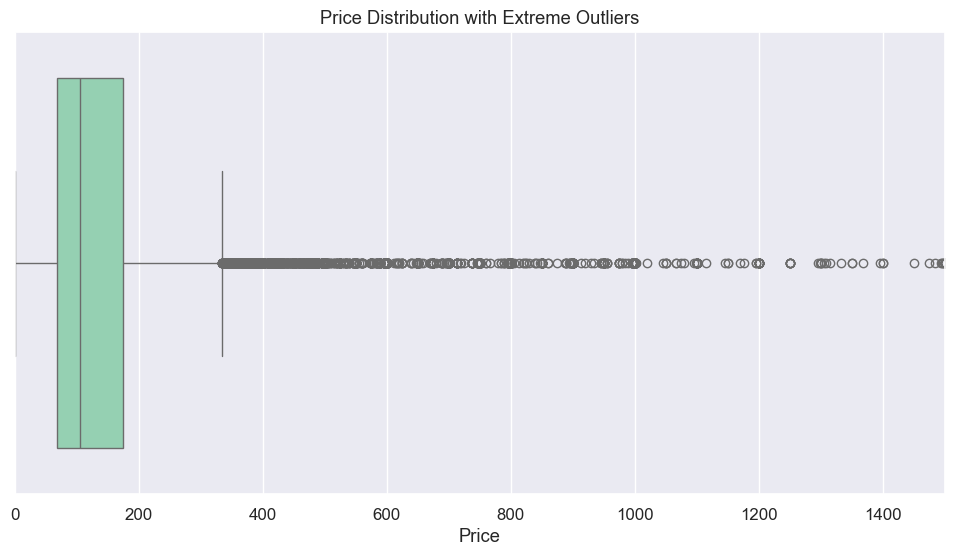

In [68]:
high_price_listings = df[df['price'] > 1000]

print(f"There are {len(high_price_listings)} listings with a price over $1000.")
print("Sample of high-priced listings:")
print(high_price_listings[['name', 'neighbourhood_group', 'price']].head())

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Price Distribution with Extreme Outliers')
plt.xlabel('Price')
plt.xlim(0, 1500)
plt.show()

Insight: There are indeed a few extremely expensive listings. These could be luxury penthouses, unique stays, or even mistakes (typos). Outliers distort averages and are often excluded before modeling.

# Reviews / Popularity

## Which listings have the most reviews?

In [50]:
most_reviewed_listings = df.sort_values(by='number_of_reviews', ascending=False)

print("Top 5 listings with the most reviews:")
print(most_reviewed_listings[['name', 'host_name', 'number_of_reviews']].head())

Top 5 listings with the most reviews:
                                 name host_name  number_of_reviews
11759         Room near JFK Queen Bed      Dona                629
2031       Great Bedroom in Manhattan        Jj                607
2030   Beautiful Bedroom in Manhattan        Jj                597
2015     Private Bedroom in Manhattan        Jj                594
13495         Room Near JFK Twin Beds      Dona                576


Insight: The most reviewed listings tend to be affordable and centrally located, attracting large numbers of guests. This shows popularity isn’t just about luxury — accessibility and price matter more.

## Which neighborhoods get the highest average reviews per listing?

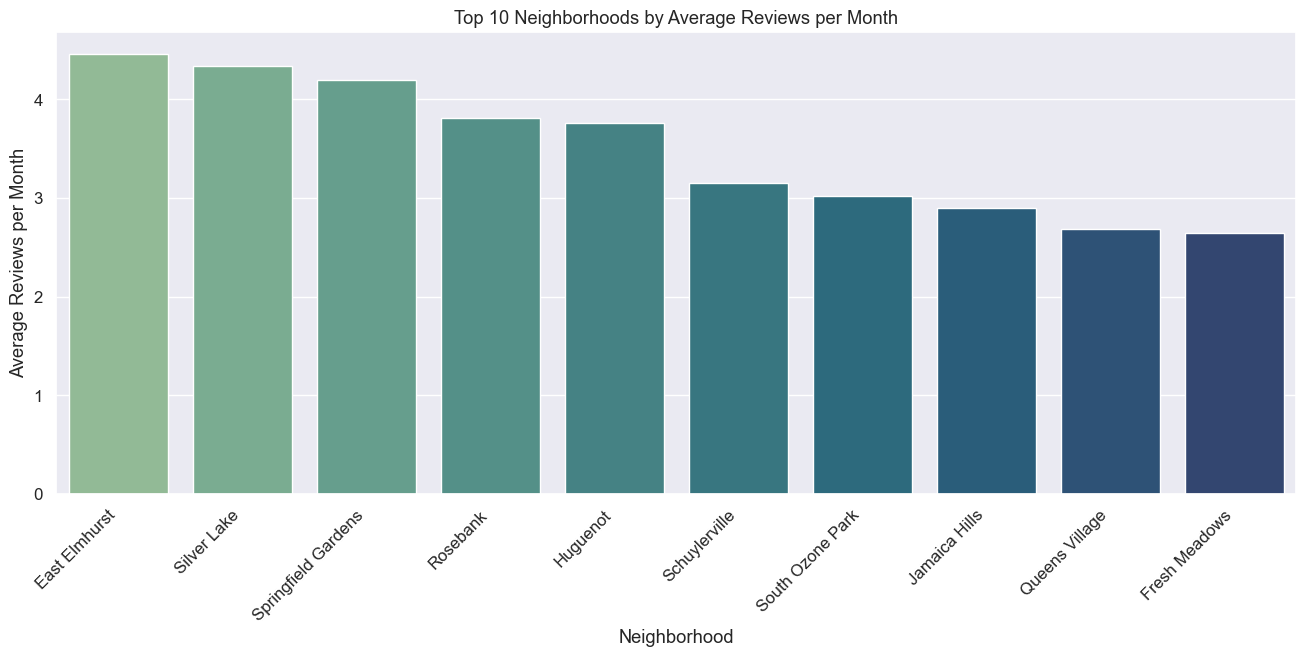

In [51]:
high_avg_review = df.groupby(df['neighbourhood'])['reviews_per_month'].mean()
result = high_avg_review.sort_values(ascending=False).head(10)

plt.figure(figsize=(16, 6))
sns.barplot(x=result.index, y=result.values, hue=result.index, palette='crest', legend=False)
plt.title('Top 10 Neighborhoods by Average Reviews per Month')
plt.xlabel('Neighborhood')
plt.ylabel('Average Reviews per Month')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: Busy, tourist-friendly neighborhoods usually appear at the top. This reinforces the idea that location is a strong driver of demand.

## Relationship between reviews and availability

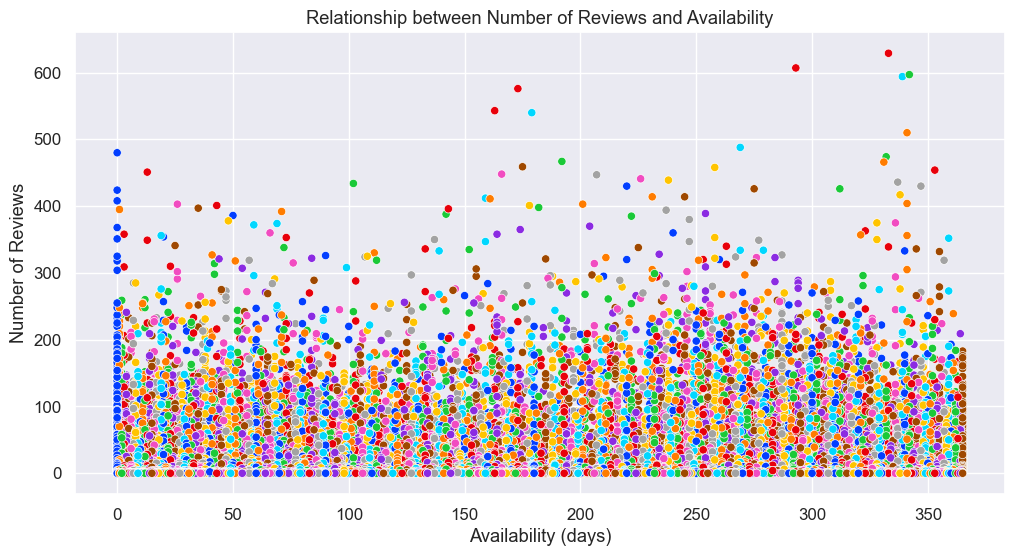

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='availability_365', y='number_of_reviews', data=df, hue = 'availability_365', palette = 'bright', legend = False)
plt.title('Relationship between Number of Reviews and Availability')
plt.xlabel('Availability (days)')
plt.ylabel('Number of Reviews')
plt.show()

Insight: No clear correlation — some highly reviewed listings aren’t always available, while some always-available ones get few reviews. Availability depends more on host strategy than on demand.

# Time-based Analysis

## What is the distribution of last_review dates?

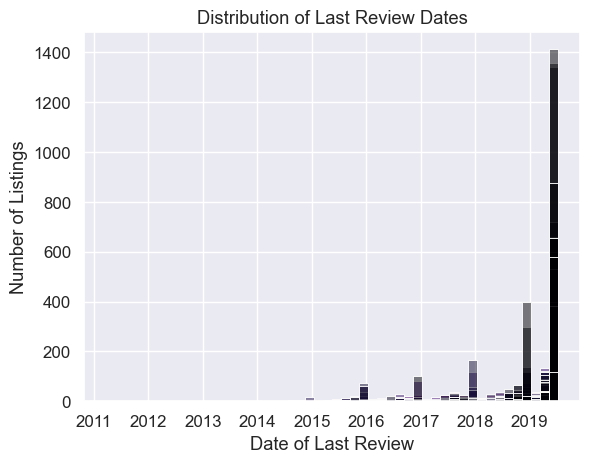

In [53]:
actual_reviews = df[df['last_review'] > '1970-01-01']

sns.histplot(data = actual_reviews, x='last_review', bins = 50, hue = 'last_review',  palette = 'magma', legend = False)
plt.title('Distribution of Last Review Dates')
plt.xlabel('Date of Last Review')
plt.ylabel('Number of Listings')
plt.show()

Insight: The number of reviews per date shows seasonal and external impacts. For example, a sharp drop after early 2020 may reflect COVID’s effect on travel. Peaks may indicate holiday seasons or summer travel.

## Are newer listings priced differently from older ones?

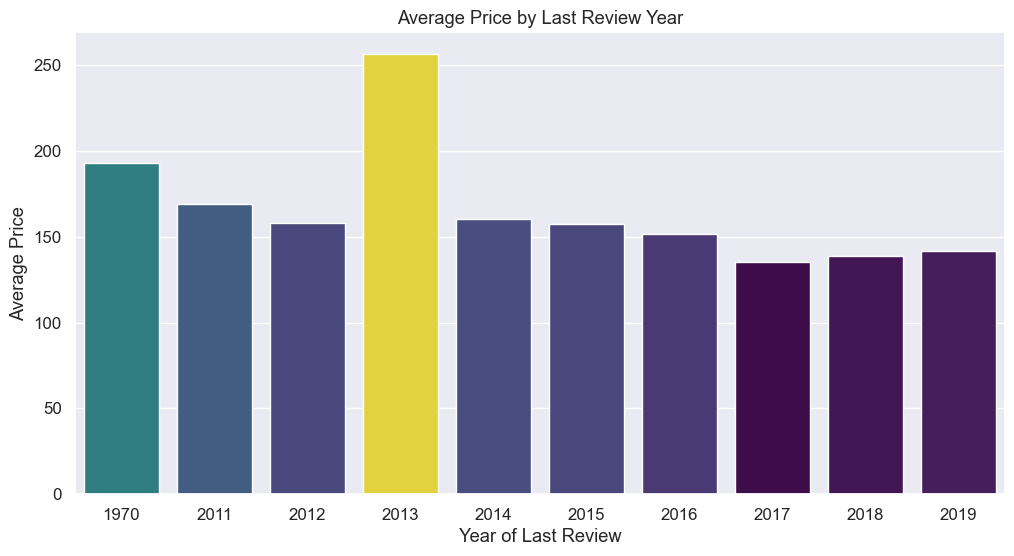

In [54]:
last_review_year = df['last_review'].dt.year
avg_price_by_year = df.groupby(last_review_year)['price'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_year.index, y=avg_price_by_year.values, hue = avg_price_by_year , palette='viridis', legend = False)
plt.title('Average Price by Last Review Year')
plt.xlabel('Year of Last Review')
plt.ylabel('Average Price')
plt.show()

Insight: Newer listings often start with lower prices to attract first reviews. Older listings with established reputation may increase prices over time.

# Advanced EDA

## Average price by (borough × room type)

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.506596     66.788344    59.800000
Brooklyn                  178.327545     76.500099    50.527845
Manhattan                 249.239109    116.776622    88.977083
Queens                    147.050573     71.762456    69.020202
Staten Island             173.846591     62.292553    57.444444


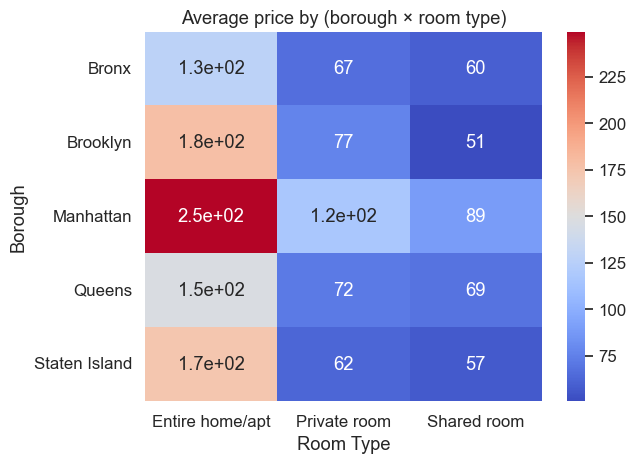

In [55]:
pivot_df = pd.pivot_table(df, index = 'neighbourhood_group', columns = 'room_type', values = 'price', aggfunc = 'mean' )
print(pivot_df)
sns.heatmap(pivot_df, annot = True, cmap = 'coolwarm')
plt.title('Average price by (borough × room type)')
plt.xlabel('Room Type')
plt.ylabel('Borough')
plt.show()

Insight: The heatmap provides a powerful summary. It clearly shows that Manhattan has the highest average prices across all room types. It also highlights that an "Entire home/apt" in Manhattan is significantly more expensive than the same room type in other boroughs.

## Correlation between 'availability_365', 'reviews_per_month', and 'price'.

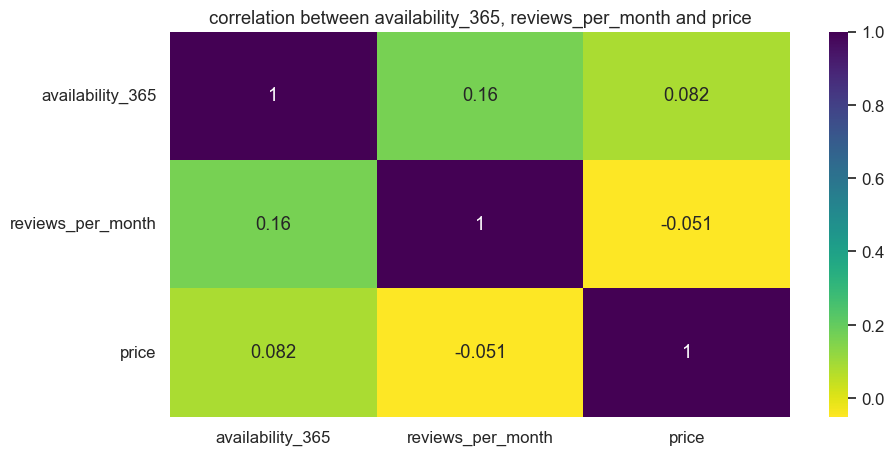

In [56]:
col_corr = df[['availability_365','reviews_per_month','price']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(col_corr, annot = True, cmap = 'viridis_r')
plt.title('correlation between availability_365, reviews_per_month and price')
plt.show()

Insight: The heatmap shows that reviews_per_month has a slight negative correlation with both price and availability_365. This suggests that more expensive listings and those with higher availability tend to have fewer reviews per month.

## Feature engineering

In [57]:
df['price_per_review'] = df['price'] / (df['number_of_reviews'] + 1)
print(df[['price', 'number_of_reviews', 'price_per_review']].head())

   price  number_of_reviews  price_per_review
0    149                  9         14.900000
1    225                 45          4.891304
2    150                  0        150.000000
3     89                270          0.328413
4     80                  9          8.000000


Insight: This step successfully creates a new variable, price_per_review, that can be used for further analysis. This is an example of feature engineering, a critical step in preparing data for machine learning models.